In [31]:
import numpy as np

from engine import RMG, AdvRw
from agent import RandomAgent, IndQLearningAgent, FPLearningAgent, FPQwForgetAgent

In [36]:
N_EXP = 10

r0ss = []
r1ss = []

smooth = 100

for n in range(N_EXP):
    batch_size = 1
    max_steps = 1
    gamma = 0.  # only one steps!

    mode = 'adversary'
    env = AdvRw(mode, p=0.6)  # p is only used in neutral mode
    env.reset()

    possible_actions = [0, 1]  # Target A or B

    #p = IndQLearningAgent(possible_actions, n_states=1, learning_rate=0.1, epsilon=0.1, gamma=gamma)
    p = FPLearningAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.1, epsilon=0.1, gamma=gamma)
    #p = FPQwForgetAgent(possible_actions, possible_actions, n_states=1, learning_rate=0.1, epsilon=0.1, 
    #                    gamma=gamma, forget=0.9)

    # Stateless interactions (agents do not have memory)
    s = 0

    n_iter = 1000 + smooth # because of the smoothening in the graphics

    r0s = []
    r1s = []

    for i in range(n_iter):

        # A full episode:
        done = False

        while not done:

            # Agents decide
            a0 = p.act()

            # World changes
            _, (r0, _), done, _ = env.step(a0)

            # Agents learn
            if r0 > 0: # p was correct
                a1 = a0
            else:
                a1 = 1 - a0

            p.update(s, (a0, a1), (r0, None), s )

            #s = new_s  #stateless!

            r0s.append(r0)

        env.reset()
    
    print(n)
    r0ss.append(r0s)
    r1ss.append(r1s)

---
r 50
p [0.375 0.625]
---
---
r -50
p [0.28125 0.71875]
---
---
r 50
p [0.4609375 0.5390625]
---
---
r 50
p [0.59570312 0.40429688]
---
---
r -50
p [0.69677734 0.30322266]
---
---
r -50
p [0.77258301 0.22741699]
---
---
r -50
p [0.82943726 0.17056274]
---
---
r 50
p [0.62207794 0.37792206]
---
---
r 50
p [0.46655846 0.53344154]
---
---
r -50
p [0.34991884 0.65008116]
---
---
r -50
p [0.26243913 0.73756087]
---
---
r -50
p [0.19682935 0.80317065]
---
---
r -50
p [0.14762201 0.85237799]
---
---
r 50
p [0.36071651 0.63928349]
---
---
r 50
p [0.52053738 0.47946262]
---
---
r -50
p [0.64040304 0.35959696]
---
---
r -50
p [0.73030228 0.26969772]
---
---
r -50
p [0.79772671 0.20227329]
---
---
r -50
p [0.84829503 0.15170497]
---
---
r 50
p [0.63622127 0.36377873]
---
---
r 50
p [0.47716595 0.52283405]
---
---
r -50
p [0.35787447 0.64212553]
---
---
r -50
p [0.26840585 0.73159415]
---
---
r -50
p [0.20130439 0.79869561]
---
---
r -50
p [0.15097829 0.84902171]
---
---
r 50
p [0.36323372 0.63

r 50
p [0.48132272 0.51867728]
---
---
r -50
p [0.36099204 0.63900796]
---
---
r -50
p [0.27074403 0.72925597]
---
---
r -50
p [0.20305802 0.79694198]
---
---
r -50
p [0.15229352 0.84770648]
---
---
r 50
p [0.36422014 0.63577986]
---
---
r 50
p [0.5231651 0.4768349]
---
---
r -50
p [0.64237383 0.35762617]
---
---
r -50
p [0.73178037 0.26821963]
---
---
r -50
p [0.79883528 0.20116472]
---
---
r -50
p [0.84912646 0.15087354]
---
---
r 50
p [0.63684484 0.36315516]
---
---
r 50
p [0.47763363 0.52236637]
---
---
r -50
p [0.35822522 0.64177478]
---
---
r -50
p [0.26866892 0.73133108]
---
---
r -50
p [0.20150169 0.79849831]
---
---
r 50
p [0.40112627 0.59887373]
---
---
r 50
p [0.5508447 0.4491553]
---
---
r -50
p [0.66313352 0.33686648]
---
---
r -50
p [0.74735014 0.25264986]
---
---
r -50
p [0.81051261 0.18948739]
---
---
r 50
p [0.60788446 0.39211554]
---
---
r 50
p [0.45591334 0.54408666]
---
---
r -50
p [0.34193501 0.65806499]
---
---
r -50
p [0.25645125 0.74354875]
---
---
r -50
p [0.19

---
r -50
p [0.84892231 0.15107769]
---
---
r 50
p [0.63669173 0.36330827]
---
---
r 50
p [0.4775188 0.5224812]
---
---
r -50
p [0.3581391 0.6418609]
---
---
r -50
p [0.26860432 0.73139568]
---
---
r -50
p [0.20145324 0.79854676]
---
---
r -50
p [0.15108993 0.84891007]
---
---
r 50
p [0.36331745 0.63668255]
---
---
r 50
p [0.52248809 0.47751191]
---
---
r -50
p [0.64186607 0.35813393]
---
---
r -50
p [0.73139955 0.26860045]
---
---
r -50
p [0.79854966 0.20145034]
---
---
r 50
p [0.59891225 0.40108775]
---
---
r 50
p [0.44918418 0.55081582]
---
---
r -50
p [0.33688814 0.66311186]
---
---
r 50
p [0.5026661 0.4973339]
---
---
r -50
p [0.62699958 0.37300042]
---
---
r 50
p [0.47024968 0.52975032]
---
---
r -50
p [0.35268726 0.64731274]
---
---
r -50
p [0.26451545 0.73548455]
---
---
r -50
p [0.19838659 0.80161341]
---
---
r 50
p [0.39878994 0.60121006]
---
---
r 50
p [0.54909245 0.45090755]
---
---
r -50
p [0.66181934 0.33818066]
---
---
r -50
p [0.74636451 0.25363549]
---
---
r -50
p [0.8

---
r -50
p [0.27054449 0.72945551]
---
---
r -50
p [0.20290837 0.79709163]
---
---
r -50
p [0.15218128 0.84781872]
---
---
r 50
p [0.36413596 0.63586404]
---
---
r -50
p [0.27310197 0.72689803]
---
---
r 50
p [0.45482648 0.54517352]
---
---
r 50
p [0.59111986 0.40888014]
---
---
r -50
p [0.69333989 0.30666011]
---
---
r -50
p [0.77000492 0.22999508]
---
---
r -50
p [0.82750369 0.17249631]
---
---
r -50
p [0.87062777 0.12937223]
---
---
r 50
p [0.65297083 0.34702917]
---
---
r -50
p [0.73972812 0.26027188]
---
---
r 50
p [0.55479609 0.44520391]
---
---
r 50
p [0.41609707 0.58390293]
---
---
r -50
p [0.3120728 0.6879272]
---
---
r -50
p [0.2340546 0.7659454]
---
---
r -50
p [0.17554095 0.82445905]
---
---
r -50
p [0.13165571 0.86834429]
---
---
r 50
p [0.34874178 0.65125822]
---
---
r 50
p [0.51155634 0.48844366]
---
---
r -50
p [0.63366725 0.36633275]
---
---
r -50
p [0.72525044 0.27474956]
---
---
r -50
p [0.79393783 0.20606217]
---
---
r 50
p [0.59545337 0.40454663]
---
---
r 50
p [0

---
r -50
p [0.66101535 0.33898465]
---
---
r -50
p [0.74576151 0.25423849]
---
---
r -50
p [0.80932114 0.19067886]
---
---
r -50
p [0.85699085 0.14300915]
---
---
r 50
p [0.64274314 0.35725686]
---
---
r 50
p [0.48205735 0.51794265]
---
---
r 50
p [0.61154302 0.38845698]
---
---
r 50
p [0.45865726 0.54134274]
---
---
r -50
p [0.34399295 0.65600705]
---
---
r -50
p [0.25799471 0.74200529]
---
---
r -50
p [0.19349603 0.80650397]
---
---
r -50
p [0.14512202 0.85487798]
---
---
r 50
p [0.35884152 0.64115848]
---
---
r 50
p [0.51913114 0.48086886]
---
---
r -50
p [0.63934835 0.36065165]
---
---
r -50
p [0.72951127 0.27048873]
---
---
r -50
p [0.79713345 0.20286655]
---
---
r -50
p [0.84785009 0.15214991]
---
---
r 50
p [0.63588757 0.36411243]
---
---
r 50
p [0.47691567 0.52308433]
---
---
r -50
p [0.35768676 0.64231324]
---
---
r -50
p [0.26826507 0.73173493]
---
---
r -50
p [0.2011988 0.7988012]
---
---
r -50
p [0.1508991 0.8491009]
---
---
r 50
p [0.36317432 0.63682568]
---
---
r 50
p [0

---
---
r -50
p [0.25542221 0.74457779]
---
---
r -50
p [0.19156666 0.80843334]
---
---
r 50
p [0.39367499 0.60632501]
---
---
r -50
p [0.29525625 0.70474375]
---
---
r 50
p [0.47144218 0.52855782]
---
---
r 50
p [0.60358164 0.39641836]
---
---
r -50
p [0.70268623 0.29731377]
---
---
r -50
p [0.77701467 0.22298533]
---
---
r -50
p [0.832761 0.167239]
---
---
r -50
p [0.87457075 0.12542925]
---
---
r 50
p [0.65592806 0.34407194]
---
---
r 50
p [0.49194605 0.50805395]
---
---
r -50
p [0.36895954 0.63104046]
---
---
r -50
p [0.27671965 0.72328035]
---
---
r 50
p [0.45753974 0.54246026]
---
---
r 50
p [0.5931548 0.4068452]
---
---
r -50
p [0.6948661 0.3051339]
---
---
r -50
p [0.77114958 0.22885042]
---
---
r -50
p [0.82836218 0.17163782]
---
---
r 50
p [0.62127164 0.37872836]
---
---
r 50
p [0.46595373 0.53404627]
---
---
r -50
p [0.3494653 0.6505347]
---
---
r -50
p [0.26209897 0.73790103]
---
---
r -50
p [0.19657423 0.80342577]
---
---
r 50
p [0.39743067 0.60256933]
---
---
r 50
p [0.54

p [0.76450585 0.23549415]
---
---
r 50
p [0.57337938 0.42662062]
---
---
r 50
p [0.43003454 0.56996546]
---
---
r -50
p [0.3225259 0.6774741]
---
---
r -50
p [0.24189443 0.75810557]
---
---
r -50
p [0.18142082 0.81857918]
---
---
r 50
p [0.38606562 0.61393438]
---
---
r -50
p [0.28954921 0.71045079]
---
---
r 50
p [0.46716191 0.53283809]
---
---
r 50
p [0.60037143 0.39962857]
---
---
r -50
p [0.70027857 0.29972143]
---
---
r -50
p [0.77520893 0.22479107]
---
---
r 50
p [0.5814067 0.4185933]
---
---
r -50
p [0.68605502 0.31394498]
---
---
r -50
p [0.76454127 0.23545873]
---
---
r 50
p [0.57340595 0.42659405]
---
---
r 50
p [0.43005446 0.56994554]
---
---
r -50
p [0.32254085 0.67745915]
---
---
r -50
p [0.24190564 0.75809436]
---
---
r -50
p [0.18142923 0.81857077]
---
---
r 50
p [0.38607192 0.61392808]
---
---
r 50
p [0.53955394 0.46044606]
---
---
r -50
p [0.65466545 0.34533455]
---
---
r -50
p [0.74099909 0.25900091]
---
---
r -50
p [0.80574932 0.19425068]
---
---
r 50
p [0.60431199 0

---
r -50
p [0.17863292 0.82136708]
---
---
r -50
p [0.13397469 0.86602531]
---
---
r 50
p [0.35048102 0.64951898]
---
---
r 50
p [0.51286077 0.48713923]
---
---
r -50
p [0.63464557 0.36535443]
---
---
r -50
p [0.72598418 0.27401582]
---
---
r -50
p [0.79448814 0.20551186]
---
---
r -50
p [0.8458661 0.1541339]
---
---
r 50
p [0.63439958 0.36560042]
---
---
r 50
p [0.47579968 0.52420032]
---
---
r -50
p [0.35684976 0.64315024]
---
---
r -50
p [0.26763732 0.73236268]
---
---
r -50
p [0.20072799 0.79927201]
---
---
r -50
p [0.15054599 0.84945401]
---
---
r 50
p [0.36290949 0.63709051]
---
---
r 50
p [0.52218212 0.47781788]
---
---
r -50
p [0.64163659 0.35836341]
---
---
r -50
p [0.73122744 0.26877256]
---
---
r -50
p [0.79842058 0.20157942]
---
---
r -50
p [0.84881544 0.15118456]
---
---
r 50
p [0.63661158 0.36338842]
---
---
r 50
p [0.47745868 0.52254132]
---
---
r -50
p [0.35809401 0.64190599]
---
---
r -50
p [0.26857051 0.73142949]
---
---
r -50
p [0.20142788 0.79857212]
---
---
r -50


p [0.82735778 0.17264222]
---
---
r -50
p [0.87051834 0.12948166]
---
---
r -50
p [0.90288875 0.09711125]
---
---
r -50
p [0.92716656 0.07283344]
---
---
r 50
p [0.69537492 0.30462508]
---
---
r 50
p [0.52153119 0.47846881]
---
---
r 50
p [0.39114839 0.60885161]
---
---
r -50
p [0.2933613 0.7066387]
---
---
r -50
p [0.22002097 0.77997903]
---
---
r -50
p [0.16501573 0.83498427]
---
---
r -50
p [0.1237618 0.8762382]
---
---
r -50
p [0.09282135 0.90717865]
---
---
r 50
p [0.31961601 0.68038399]
---
---
r 50
p [0.48971201 0.51028799]
---
---
r 50
p [0.61728401 0.38271599]
---
---
r -50
p [0.712963 0.287037]
---
---
r -50
p [0.78472225 0.21527775]
---
---
r -50
p [0.83854169 0.16145831]
---
---
r -50
p [0.87890627 0.12109373]
---
---
r -50
p [0.9091797 0.0908203]
---
---
r 50
p [0.68188478 0.31811522]
---
---
r 50
p [0.51141358 0.48858642]
---
---
r 50
p [0.38356019 0.61643981]
---
---
r -50
p [0.28767014 0.71232986]
---
---
r -50
p [0.2157526 0.7842474]
---
---
r -50
p [0.16181445 0.83818

---
---
r 50
p [0.60895955 0.39104045]
---
---
r 50
p [0.45671966 0.54328034]
---
---
r -50
p [0.34253975 0.65746025]
---
---
r -50
p [0.25690481 0.74309519]
---
---
r -50
p [0.19267861 0.80732139]
---
---
r -50
p [0.14450896 0.85549104]
---
---
r -50
p [0.10838172 0.89161828]
---
---
r 50
p [0.33128629 0.66871371]
---
---
r 50
p [0.49846472 0.50153528]
---
---
r 50
p [0.62384854 0.37615146]
---
---
r -50
p [0.7178864 0.2821136]
---
---
r -50
p [0.7884148 0.2115852]
---
---
r -50
p [0.8413111 0.1586889]
---
---
r -50
p [0.88098333 0.11901667]
---
---
r -50
p [0.91073749 0.08926251]
---
---
r -50
p [0.93305312 0.06694688]
---
---
r 50
p [0.69978984 0.30021016]
---
---
r 50
p [0.52484238 0.47515762]
---
---
r 50
p [0.39363179 0.60636821]
---
---
r -50
p [0.29522384 0.70477616]
---
---
r -50
p [0.22141788 0.77858212]
---
---
r -50
p [0.16606341 0.83393659]
---
---
r -50
p [0.12454756 0.87545244]
---
---
r -50
p [0.09341067 0.90658933]
---
---
r 50
p [0.320058 0.679942]
---
---
r 50
p [0.4

---
r 50
p [0.52248788 0.47751212]
---
---
r -50
p [0.64186591 0.35813409]
---
---
r -50
p [0.73139943 0.26860057]
---
---
r -50
p [0.79854957 0.20145043]
---
---
r -50
p [0.84891218 0.15108782]
---
---
r 50
p [0.63668414 0.36331586]
---
---
r 50
p [0.4775131 0.5224869]
---
---
r -50
p [0.35813483 0.64186517]
---
---
r 50
p [0.51860112 0.48139888]
---
---
r 50
p [0.38895084 0.61104916]
---
---
r -50
p [0.29171313 0.70828687]
---
---
r -50
p [0.21878485 0.78121515]
---
---
r 50
p [0.41408864 0.58591136]
---
---
r 50
p [0.56056648 0.43943352]
---
---
r -50
p [0.67042486 0.32957514]
---
---
r -50
p [0.75281864 0.24718136]
---
---
r -50
p [0.81461398 0.18538602]
---
---
r 50
p [0.61096049 0.38903951]
---
---
r 50
p [0.45822037 0.54177963]
---
---
r -50
p [0.34366527 0.65633473]
---
---
r -50
p [0.25774896 0.74225104]
---
---
r -50
p [0.19331172 0.80668828]
---
---
r -50
p [0.14498379 0.85501621]
---
---
r 50
p [0.35873784 0.64126216]
---
---
r 50
p [0.51905338 0.48094662]
---
---
r -50
p [

---
r -50
p [0.23780921 0.76219079]
---
---
r 50
p [0.42835691 0.57164309]
---
---
r 50
p [0.57126768 0.42873232]
---
---
r -50
p [0.67845076 0.32154924]
---
---
r 50
p [0.50883807 0.49116193]
---
---
r 50
p [0.38162855 0.61837145]
---
---
r -50
p [0.28622141 0.71377859]
---
---
r 50
p [0.46466606 0.53533394]
---
---
r 50
p [0.59849955 0.40150045]
---
---
r -50
p [0.69887466 0.30112534]
---
---
r -50
p [0.77415599 0.22584401]
---
---
r -50
p [0.830617 0.169383]
---
---
r 50
p [0.62296275 0.37703725]
---
---
r -50
p [0.71722206 0.28277794]
---
---
r 50
p [0.53791655 0.46208345]
---
---
r 50
p [0.40343741 0.59656259]
---
---
r -50
p [0.30257806 0.69742194]
---
---
r -50
p [0.22693354 0.77306646]
---
---
r -50
p [0.17020016 0.82979984]
---
---
r -50
p [0.12765012 0.87234988]
---
---
r -50
p [0.09573759 0.90426241]
---
---
r -50
p [0.07180319 0.92819681]
---
---
r 50
p [0.30385239 0.69614761]
---
---
r 50
p [0.4778893 0.5221107]
---
---
r 50
p [0.60841697 0.39158303]
---
---
r 50
p [0.4563

r 50
p [0.4199851 0.5800149]
---
---
r 50
p [0.56498882 0.43501118]
---
---
r -50
p [0.67374162 0.32625838]
---
---
r -50
p [0.75530621 0.24469379]
---
---
r -50
p [0.81647966 0.18352034]
---
---
r -50
p [0.86235975 0.13764025]
---
---
r -50
p [0.89676981 0.10323019]
---
---
r -50
p [0.92257736 0.07742264]
---
---
r 50
p [0.69193302 0.30806698]
---
---
r 50
p [0.51894976 0.48105024]
---
---
r 50
p [0.38921232 0.61078768]
---
---
r -50
p [0.29190924 0.70809076]
---
---
r -50
p [0.21893193 0.78106807]
---
---
r -50
p [0.16419895 0.83580105]
---
---
r -50
p [0.12314921 0.87685079]
---
---
r -50
p [0.09236191 0.90763809]
---
---
r 50
p [0.31927143 0.68072857]
---
---
r 50
p [0.48945357 0.51054643]
---
---
r 50
p [0.61709018 0.38290982]
---
---
r -50
p [0.71281764 0.28718236]
---
---
r -50
p [0.78461323 0.21538677]
---
---
r -50
p [0.83845992 0.16154008]
---
---
r 50
p [0.62884494 0.37115506]
---
---
r -50
p [0.7216337 0.2783663]
---
---
r 50
p [0.54122528 0.45877472]
---
---
r 50
p [0.4059

r -50
p [0.35762138 0.64237862]
---
---
r -50
p [0.26821603 0.73178397]
---
---
r -50
p [0.20116202 0.79883798]
---
---
r -50
p [0.15087152 0.84912848]
---
---
r 50
p [0.36315364 0.63684636]
---
---
r 50
p [0.52236523 0.47763477]
---
---
r -50
p [0.64177392 0.35822608]
---
---
r -50
p [0.73133044 0.26866956]
---
---
r -50
p [0.79849783 0.20150217]
---
---
r -50
p [0.84887337 0.15112663]
---
---
r 50
p [0.63665503 0.36334497]
---
---
r 50
p [0.47749127 0.52250873]
---
---
r -50
p [0.35811845 0.64188155]
---
---
r -50
p [0.26858884 0.73141116]
---
---
r -50
p [0.20144163 0.79855837]
---
---
r -50
p [0.15108122 0.84891878]
---
---
r 50
p [0.36331092 0.63668908]
---
---
r 50
p [0.52248319 0.47751681]
---
---
r -50
p [0.64186239 0.35813761]
---
---
r -50
p [0.73139679 0.26860321]
---
---
r -50
p [0.79854759 0.20145241]
---
---
r -50
p [0.8489107 0.1510893]
---
---
r 50
p [0.63668302 0.36331698]
---
---
r 50
p [0.47751227 0.52248773]
---
---
r -50
p [0.3581342 0.6418658]
---
---
r -50
p [0.2

r -50
p [0.20144771 0.79855229]
---
---
r -50
p [0.15108578 0.84891422]
---
---
r 50
p [0.36331434 0.63668566]
---
---
r 50
p [0.52248575 0.47751425]
---
---
r -50
p [0.64186431 0.35813569]
---
---
r 50
p [0.48139824 0.51860176]
---
---
r 50
p [0.61104868 0.38895132]
---
---
r 50
p [0.45828651 0.54171349]
---
---
r 50
p [0.59371488 0.40628512]
---
---
r -50
p [0.69528616 0.30471384]
---
---
r -50
p [0.77146462 0.22853538]
---
---
r -50
p [0.82859847 0.17140153]
---
---
r 50
p [0.62144885 0.37855115]
---
---
r 50
p [0.46608664 0.53391336]
---
---
r -50
p [0.34956498 0.65043502]
---
---
r -50
p [0.26217373 0.73782627]
---
---
r -50
p [0.1966303 0.8033697]
---
---
r -50
p [0.14747272 0.85252728]
---
---
r 50
p [0.36060454 0.63939546]
---
---
r 50
p [0.52045341 0.47954659]
---
---
r -50
p [0.64034006 0.35965994]
---
---
r 50
p [0.48025504 0.51974496]
---
---
r 50
p [0.61019128 0.38980872]
---
---
r -50
p [0.70764346 0.29235654]
---
---
r -50
p [0.7807326 0.2192674]
---
---
r 50
p [0.585549

r 50
p [0.63668394 0.36331606]
---
---
r 50
p [0.47751296 0.52248704]
---
---
r -50
p [0.35813472 0.64186528]
---
---
r -50
p [0.26860104 0.73139896]
---
---
r -50
p [0.20145078 0.79854922]
---
---
r -50
p [0.15108808 0.84891192]
---
---
r 50
p [0.36331606 0.63668394]
---
---
r 50
p [0.52248705 0.47751295]
---
---
r 50
p [0.39186529 0.60813471]
---
---
r 50
p [0.54389896 0.45610104]
---
---
r -50
p [0.65792422 0.34207578]
---
---
r -50
p [0.74344317 0.25655683]
---
---
r -50
p [0.80758238 0.19241762]
---
---
r -50
p [0.85568678 0.14431322]
---
---
r 50
p [0.64176509 0.35823491]
---
---
r 50
p [0.48132381 0.51867619]
---
---
r -50
p [0.36099286 0.63900714]
---
---
r -50
p [0.27074465 0.72925535]
---
---
r -50
p [0.20305848 0.79694152]
---
---
r -50
p [0.15229386 0.84770614]
---
---
r 50
p [0.3642204 0.6357796]
---
---
r 50
p [0.5231653 0.4768347]
---
---
r -50
p [0.64237397 0.35762603]
---
---
r -50
p [0.73178048 0.26821952]
---
---
r -50
p [0.79883536 0.20116464]
---
---
r -50
p [0.849

r 50
p [0.36237335 0.63762665]
---
---
r 50
p [0.52178002 0.47821998]
---
---
r -50
p [0.64133501 0.35866499]
---
---
r -50
p [0.73100126 0.26899874]
---
---
r -50
p [0.79825094 0.20174906]
---
---
r -50
p [0.84868821 0.15131179]
---
---
r 50
p [0.63651616 0.36348384]
---
---
r 50
p [0.47738712 0.52261288]
---
---
r -50
p [0.35804034 0.64195966]
---
---
r -50
p [0.26853025 0.73146975]
---
---
r -50
p [0.20139769 0.79860231]
---
---
r -50
p [0.15104827 0.84895173]
---
---
r 50
p [0.3632862 0.6367138]
---
---
r 50
p [0.52246465 0.47753535]
---
---
r -50
p [0.64184849 0.35815151]
---
---
r -50
p [0.73138637 0.26861363]
---
---
r -50
p [0.79853977 0.20146023]
---
---
r -50
p [0.84890483 0.15109517]
---
---
r 50
p [0.63667862 0.36332138]
---
---
r 50
p [0.47750897 0.52249103]
---
---
r 50
p [0.60813173 0.39186827]
---
---
r 50
p [0.45609879 0.54390121]
---
---
r -50
p [0.3420741 0.6579259]
---
---
r -50
p [0.25655557 0.74344443]
---
---
r -50
p [0.19241668 0.80758332]
---
---
r -50
p [0.144

p [0.58885708 0.41114292]
---
---
r -50
p [0.69164281 0.30835719]
---
---
r -50
p [0.76873211 0.23126789]
---
---
r -50
p [0.82654908 0.17345092]
---
---
r 50
p [0.61991181 0.38008819]
---
---
r 50
p [0.46493386 0.53506614]
---
---
r -50
p [0.34870039 0.65129961]
---
---
r -50
p [0.2615253 0.7384747]
---
---
r -50
p [0.19614397 0.80385603]
---
---
r 50
p [0.39710798 0.60289202]
---
---
r 50
p [0.54783098 0.45216902]
---
---
r -50
p [0.66087324 0.33912676]
---
---
r -50
p [0.74565493 0.25434507]
---
---
r -50
p [0.8092412 0.1907588]
---
---
r 50
p [0.6069309 0.3930691]
---
---
r 50
p [0.45519817 0.54480183]
---
---
r -50
p [0.34139863 0.65860137]
---
---
r -50
p [0.25604897 0.74395103]
---
---
r -50
p [0.19203673 0.80796327]
---
---
r 50
p [0.39402755 0.60597245]
---
---
r 50
p [0.54552066 0.45447934]
---
---
r -50
p [0.6591405 0.3408595]
---
---
r -50
p [0.74435537 0.25564463]
---
---
r -50
p [0.80826653 0.19173347]
---
---
r 50
p [0.6061999 0.3938001]
---
---
r 50
p [0.45464992 0.5453

r -50
p [0.90694919 0.09305081]
---
---
r 50
p [0.68021189 0.31978811]
---
---
r 50
p [0.51015892 0.48984108]
---
---
r 50
p [0.38261919 0.61738081]
---
---
r -50
p [0.28696439 0.71303561]
---
---
r -50
p [0.21522329 0.78477671]
---
---
r 50
p [0.41141747 0.58858253]
---
---
r -50
p [0.3085631 0.6914369]
---
---
r 50
p [0.48142233 0.51857767]
---
---
r 50
p [0.61106675 0.38893325]
---
---
r -50
p [0.70830006 0.29169994]
---
---
r -50
p [0.78122504 0.21877496]
---
---
r -50
p [0.83591878 0.16408122]
---
---
r 50
p [0.62693909 0.37306091]
---
---
r 50
p [0.47020432 0.52979568]
---
---
r -50
p [0.35265324 0.64734676]
---
---
r -50
p [0.26448993 0.73551007]
---
---
r -50
p [0.19836745 0.80163255]
---
---
r 50
p [0.39877558 0.60122442]
---
---
r 50
p [0.54908169 0.45091831]
---
---
r -50
p [0.66181127 0.33818873]
---
---
r -50
p [0.74635845 0.25364155]
---
---
r -50
p [0.80976884 0.19023116]
---
---
r 50
p [0.60732663 0.39267337]
---
---
r 50
p [0.45549497 0.54450503]
---
---
r -50
p [0.341

r -50
p [0.65735359 0.34264641]
---
---
r 50
p [0.4930152 0.5069848]
---
---
r 50
p [0.6197614 0.3802386]
---
---
r -50
p [0.71482105 0.28517895]
---
---
r -50
p [0.78611579 0.21388421]
---
---
r 50
p [0.58958684 0.41041316]
---
---
r 50
p [0.44219013 0.55780987]
---
---
r -50
p [0.3316426 0.6683574]
---
---
r -50
p [0.24873195 0.75126805]
---
---
r 50
p [0.43654896 0.56345104]
---
---
r -50
p [0.32741172 0.67258828]
---
---
r 50
p [0.49555879 0.50444121]
---
---
r 50
p [0.62166909 0.37833091]
---
---
r -50
p [0.71625182 0.28374818]
---
---
r -50
p [0.78718886 0.21281114]
---
---
r -50
p [0.84039165 0.15960835]
---
---
r -50
p [0.88029374 0.11970626]
---
---
r 50
p [0.6602203 0.3397797]
---
---
r 50
p [0.49516523 0.50483477]
---
---
r -50
p [0.37137392 0.62862608]
---
---
r 50
p [0.52853044 0.47146956]
---
---
r 50
p [0.39639783 0.60360217]
---
---
r -50
p [0.29729837 0.70270163]
---
---
r -50
p [0.22297378 0.77702622]
---
---
r 50
p [0.41723033 0.58276967]
---
---
r 50
p [0.56292275 0

p [0.76235464 0.23764536]
---
---
r 50
p [0.57176598 0.42823402]
---
---
r 50
p [0.42882449 0.57117551]
---
---
r -50
p [0.32161836 0.67838164]
---
---
r -50
p [0.24121377 0.75878623]
---
---
r -50
p [0.18091033 0.81908967]
---
---
r 50
p [0.38568275 0.61431725]
---
---
r 50
p [0.53926206 0.46073794]
---
---
r -50
p [0.65444655 0.34555345]
---
---
r -50
p [0.74083491 0.25916509]
---
---
r -50
p [0.80562618 0.19437382]
---
---
r 50
p [0.60421964 0.39578036]
---
---
r 50
p [0.45316473 0.54683527]
---
---
r -50
p [0.33987355 0.66012645]
---
---
r -50
p [0.25490516 0.74509484]
---
---
r -50
p [0.19117887 0.80882113]
---
---
r 50
p [0.39338415 0.60661585]
---
---
r 50
p [0.54503811 0.45496189]
---
---
r -50
p [0.65877859 0.34122141]
---
---
r -50
p [0.74408394 0.25591606]
---
---
r -50
p [0.80806295 0.19193705]
---
---
r 50
p [0.60604722 0.39395278]
---
---
r 50
p [0.45453541 0.54546459]
---
---
r -50
p [0.34090156 0.65909844]
---
---
r 50
p [0.50567617 0.49432383]
---
---
r 50
p [0.3792571

r -50
p [0.24894754 0.75105246]
---
---
r -50
p [0.18671065 0.81328935]
---
---
r 50
p [0.39003299 0.60996701]
---
---
r 50
p [0.54252474 0.45747526]
---
---
r -50
p [0.65689356 0.34310644]
---
---
r -50
p [0.74267017 0.25732983]
---
---
r -50
p [0.80700263 0.19299737]
---
---
r -50
p [0.85525197 0.14474803]
---
---
r -50
p [0.89143898 0.10856102]
---
---
r -50
p [0.91857923 0.08142077]
---
---
r 50
p [0.68893442 0.31106558]
---
---
r 50
p [0.51670082 0.48329918]
---
---
r 50
p [0.38752561 0.61247439]
---
---
r -50
p [0.29064421 0.70935579]
---
---
r 50
p [0.46798316 0.53201684]
---
---
r -50
p [0.35098737 0.64901263]
---
---
r -50
p [0.26324053 0.73675947]
---
---
r -50
p [0.19743039 0.80256961]
---
---
r -50
p [0.1480728 0.8519272]
---
---
r 50
p [0.3610546 0.6389454]
---
---
r 50
p [0.52079095 0.47920905]
---
---
r -50
p [0.64059321 0.35940679]
---
---
r -50
p [0.73044491 0.26955509]
---
---
r 50
p [0.54783368 0.45216632]
---
---
r 50
p [0.41087526 0.58912474]
---
---
r -50
p [0.308

p [0.70393542 0.29606458]
---
---
r 50
p [0.52795157 0.47204843]
---
---
r 50
p [0.39596368 0.60403632]
---
---
r 50
p [0.54697276 0.45302724]
---
---
r 50
p [0.41022957 0.58977043]
---
---
r 50
p [0.55767218 0.44232782]
---
---
r 50
p [0.41825413 0.58174587]
---
---
r 50
p [0.5636906 0.4363094]
---
---
r 50
p [0.42276795 0.57723205]
---
---
r -50
p [0.31707596 0.68292404]
---
---
r -50
p [0.23780697 0.76219303]
---
---
r -50
p [0.17835523 0.82164477]
---
---
r -50
p [0.13376642 0.86623358]
---
---
r -50
p [0.10032482 0.89967518]
---
---
r -50
p [0.07524361 0.92475639]
---
---
r 50
p [0.30643271 0.69356729]
---
---
r 50
p [0.47982453 0.52017547]
---
---
r 50
p [0.6098684 0.3901316]
---
---
r -50
p [0.7074013 0.2925987]
---
---
r -50
p [0.78055097 0.21944903]
---
---
r -50
p [0.83541323 0.16458677]
---
---
r -50
p [0.87655992 0.12344008]
---
---
r -50
p [0.90741994 0.09258006]
---
---
r 50
p [0.68056496 0.31943504]
---
---
r -50
p [0.76042372 0.23957628]
---
---
r 50
p [0.57031779 0.429

r -50
p [0.88698644 0.11301356]
---
---
r 50
p [0.66523983 0.33476017]
---
---
r -50
p [0.74892987 0.25107013]
---
---
r 50
p [0.56169741 0.43830259]
---
---
r 50
p [0.42127305 0.57872695]
---
---
r -50
p [0.31595479 0.68404521]
---
---
r -50
p [0.23696609 0.76303391]
---
---
r -50
p [0.17772457 0.82227543]
---
---
r -50
p [0.13329343 0.86670657]
---
---
r -50
p [0.09997007 0.90002993]
---
---
r -50
p [0.07497755 0.92502245]
---
---
r 50
p [0.30623316 0.69376684]
---
---
r 50
p [0.47967487 0.52032513]
---
---
r 50
p [0.60975616 0.39024384]
---
---
r -50
p [0.70731712 0.29268288]
---
---
r -50
p [0.78048784 0.21951216]
---
---
r -50
p [0.83536588 0.16463412]
---
---
r 50
p [0.62652441 0.37347559]
---
---
r -50
p [0.71989331 0.28010669]
---
---
r 50
p [0.53991998 0.46008002]
---
---
r -50
p [0.65493998 0.34506002]
---
---
r 50
p [0.49120499 0.50879501]
---
---
r -50
p [0.36840374 0.63159626]
---
---
r -50
p [0.27630281 0.72369719]
---
---
r -50
p [0.2072271 0.7927729]
---
---
r -50
p [0.

p [0.63668257 0.36331743]
---
---
r 50
p [0.47751193 0.52248807]
---
---
r -50
p [0.35813395 0.64186605]
---
---
r -50
p [0.26860046 0.73139954]
---
---
r -50
p [0.20145034 0.79854966]
---
---
r -50
p [0.15108776 0.84891224]
---
---
r 50
p [0.36331582 0.63668418]
---
---
r 50
p [0.52248686 0.47751314]
---
---
r -50
p [0.64186515 0.35813485]
---
---
r -50
p [0.73139886 0.26860114]
---
---
r -50
p [0.79854915 0.20145085]
---
---
r -50
p [0.84891186 0.15108814]
---
---
r 50
p [0.63668389 0.36331611]
---
---
r 50
p [0.47751292 0.52248708]
---
---
r -50
p [0.35813469 0.64186531]
---
---
r -50
p [0.26860102 0.73139898]
---
---
r -50
p [0.20145076 0.79854924]
---
---
r -50
p [0.15108807 0.84891193]
---
---
r 50
p [0.36331605 0.63668395]
---
---
r 50
p [0.52248704 0.47751296]
---
---
r -50
p [0.64186528 0.35813472]
---
---
r -50
p [0.73139896 0.26860104]
---
---
r -50
p [0.79854922 0.20145078]
---
---
r -50
p [0.84891192 0.15108808]
---
---
r 50
p [0.63668394 0.36331606]
---
---
r 50
p [0.4775

r -50
p [0.76305884 0.23694116]
---
---
r -50
p [0.82229413 0.17770587]
---
---
r -50
p [0.8667206 0.1332794]
---
---
r -50
p [0.90004045 0.09995955]
---
---
r -50
p [0.92503034 0.07496966]
---
---
r -50
p [0.94377275 0.05622725]
---
---
r 50
p [0.70782956 0.29217044]
---
---
r 50
p [0.53087217 0.46912783]
---
---
r 50
p [0.39815413 0.60184587]
---
---
r 50
p [0.5486156 0.4513844]
---
---
r 50
p [0.4114617 0.5885383]
---
---
r -50
p [0.30859627 0.69140373]
---
---
r -50
p [0.23144721 0.76855279]
---
---
r -50
p [0.1735854 0.8264146]
---
---
r -50
p [0.13018905 0.86981095]
---
---
r -50
p [0.09764179 0.90235821]
---
---
r 50
p [0.32323134 0.67676866]
---
---
r 50
p [0.49242351 0.50757649]
---
---
r 50
p [0.61931763 0.38068237]
---
---
r -50
p [0.71448822 0.28551178]
---
---
r -50
p [0.78586617 0.21413383]
---
---
r -50
p [0.83939963 0.16060037]
---
---
r -50
p [0.87954972 0.12045028]
---
---
r -50
p [0.90966229 0.09033771]
---
---
r 50
p [0.68224672 0.31775328]
---
---
r 50
p [0.5116850

---
r -50
p [0.20140908 0.79859092]
---
---
r -50
p [0.15105681 0.84894319]
---
---
r 50
p [0.3632926 0.6367074]
---
---
r 50
p [0.52246945 0.47753055]
---
---
r -50
p [0.64185209 0.35814791]
---
---
r -50
p [0.73138907 0.26861093]
---
---
r -50
p [0.7985418 0.2014582]
---
---
r -50
p [0.84890635 0.15109365]
---
---
r 50
p [0.63667976 0.36332024]
---
---
r 50
p [0.47750982 0.52249018]
---
---
r -50
p [0.35813237 0.64186763]
---
---
r -50
p [0.26859927 0.73140073]
---
---
r -50
p [0.20144946 0.79855054]
---
---
r -50
p [0.15108709 0.84891291]
---
---
r 50
p [0.36331532 0.63668468]
---
---
r 50
p [0.52248649 0.47751351]
---
---
r 50
p [0.39186487 0.60813513]
---
---
r 50
p [0.54389865 0.45610135]
---
---
r -50
p [0.65792399 0.34207601]
---
---
r -50
p [0.74344299 0.25655701]
---
---
r -50
p [0.80758224 0.19241776]
---
---
r -50
p [0.85568668 0.14431332]
---
---
r 50
p [0.64176501 0.35823499]
---
---
r 50
p [0.48132376 0.51867624]
---
---
r -50
p [0.36099282 0.63900718]
---
---
r -50
p [0

r 50
p [0.52254892 0.47745108]
---
---
r -50
p [0.64191169 0.35808831]
---
---
r -50
p [0.73143377 0.26856623]
---
---
r 50
p [0.54857533 0.45142467]
---
---
r 50
p [0.41143149 0.58856851]
---
---
r -50
p [0.30857362 0.69142638]
---
---
r -50
p [0.23143022 0.76856978]
---
---
r 50
p [0.42357266 0.57642734]
---
---
r 50
p [0.5676795 0.4323205]
---
---
r -50
p [0.67575962 0.32424038]
---
---
r -50
p [0.75681972 0.24318028]
---
---
r -50
p [0.81761479 0.18238521]
---
---
r -50
p [0.86321109 0.13678891]
---
---
r 50
p [0.64740832 0.35259168]
---
---
r 50
p [0.48555624 0.51444376]
---
---
r 50
p [0.61416718 0.38583282]
---
---
r 50
p [0.46062538 0.53937462]
---
---
r -50
p [0.34546904 0.65453096]
---
---
r -50
p [0.25910178 0.74089822]
---
---
r -50
p [0.19432633 0.80567367]
---
---
r -50
p [0.14574475 0.85425525]
---
---
r 50
p [0.35930856 0.64069144]
---
---
r 50
p [0.51948142 0.48051858]
---
---
r -50
p [0.63961107 0.36038893]
---
---
r -50
p [0.7297083 0.2702917]
---
---
r -50
p [0.7972

p [0.47226182 0.52773818]
---
---
r -50
p [0.35419636 0.64580364]
---
---
r 50
p [0.51564727 0.48435273]
---
---
r -50
p [0.63673545 0.36326455]
---
---
r -50
p [0.72755159 0.27244841]
---
---
r -50
p [0.79566369 0.20433631]
---
---
r 50
p [0.59674777 0.40325223]
---
---
r -50
p [0.69756083 0.30243917]
---
---
r 50
p [0.52317062 0.47682938]
---
---
r 50
p [0.39237797 0.60762203]
---
---
r -50
p [0.29428347 0.70571653]
---
---
r -50
p [0.22071261 0.77928739]
---
---
r -50
p [0.16553445 0.83446555]
---
---
r -50
p [0.12415084 0.87584916]
---
---
r -50
p [0.09311313 0.90688687]
---
---
r -50
p [0.06983485 0.93016515]
---
---
r 50
p [0.30237614 0.69762386]
---
---
r 50
p [0.4767821 0.5232179]
---
---
r 50
p [0.60758658 0.39241342]
---
---
r -50
p [0.70568993 0.29431007]
---
---
r -50
p [0.77926745 0.22073255]
---
---
r -50
p [0.83445059 0.16554941]
---
---
r -50
p [0.87583794 0.12416206]
---
---
r -50
p [0.90687846 0.09312154]
---
---
r 50
p [0.68015884 0.31984116]
---
---
r 50
p [0.510119

p [0.09304868 0.90695132]
---
---
r 50
p [0.31978651 0.68021349]
---
---
r 50
p [0.48983988 0.51016012]
---
---
r 50
p [0.61737991 0.38262009]
---
---
r -50
p [0.71303493 0.28696507]
---
---
r -50
p [0.7847762 0.2152238]
---
---
r -50
p [0.83858215 0.16141785]
---
---
r -50
p [0.87893661 0.12106339]
---
---
r 50
p [0.65920246 0.34079754]
---
---
r 50
p [0.49440184 0.50559816]
---
---
r 50
p [0.62080138 0.37919862]
---
---
r 50
p [0.46560104 0.53439896]
---
---
r -50
p [0.34920078 0.65079922]
---
---
r -50
p [0.26190058 0.73809942]
---
---
r -50
p [0.19642544 0.80357456]
---
---
r 50
p [0.39731908 0.60268092]
---
---
r 50
p [0.54798931 0.45201069]
---
---
r -50
p [0.66099198 0.33900802]
---
---
r -50
p [0.74574399 0.25425601]
---
---
r -50
p [0.80930799 0.19069201]
---
---
r 50
p [0.60698099 0.39301901]
---
---
r 50
p [0.45523574 0.54476426]
---
---
r -50
p [0.34142681 0.65857319]
---
---
r -50
p [0.25607011 0.74392989]
---
---
r -50
p [0.19205258 0.80794742]
---
---
r 50
p [0.39403943 

---
---
r 50
p [0.52210275 0.47789725]
---
---
r -50
p [0.64157707 0.35842293]
---
---
r -50
p [0.7311828 0.2688172]
---
---
r -50
p [0.7983871 0.2016129]
---
---
r -50
p [0.84879032 0.15120968]
---
---
r 50
p [0.63659274 0.36340726]
---
---
r 50
p [0.47744456 0.52255544]
---
---
r 50
p [0.60808342 0.39191658]
---
---
r 50
p [0.45606256 0.54393744]
---
---
r -50
p [0.34204692 0.65795308]
---
---
r -50
p [0.25653519 0.74346481]
---
---
r -50
p [0.19240139 0.80759861]
---
---
r -50
p [0.14430105 0.85569895]
---
---
r 50
p [0.35822578 0.64177422]
---
---
r 50
p [0.51866934 0.48133066]
---
---
r -50
p [0.639002 0.360998]
---
---
r -50
p [0.7292515 0.2707485]
---
---
r -50
p [0.79693863 0.20306137]
---
---
r -50
p [0.84770397 0.15229603]
---
---
r 50
p [0.63577798 0.36422202]
---
---
r 50
p [0.47683348 0.52316652]
---
---
r -50
p [0.35762511 0.64237489]
---
---
r -50
p [0.26821883 0.73178117]
---
---
r -50
p [0.20116413 0.79883587]
---
---
r -50
p [0.15087309 0.84912691]
---
---
r 50
p [0.3

p [0.52315491 0.47684509]
---
---
r -50
p [0.64236618 0.35763382]
---
---
r -50
p [0.73177464 0.26822536]
---
---
r -50
p [0.79883098 0.20116902]
---
---
r -50
p [0.84912323 0.15087677]
---
---
r -50
p [0.88684242 0.11315758]
---
---
r 50
p [0.66513182 0.33486818]
---
---
r 50
p [0.49884886 0.50115114]
---
---
r -50
p [0.37413665 0.62586335]
---
---
r -50
p [0.28060249 0.71939751]
---
---
r 50
p [0.46045186 0.53954814]
---
---
r -50
p [0.3453389 0.6546611]
---
---
r 50
p [0.50900417 0.49099583]
---
---
r -50
p [0.63175313 0.36824687]
---
---
r -50
p [0.72381485 0.27618515]
---
---
r 50
p [0.54286114 0.45713886]
---
---
r 50
p [0.40714585 0.59285415]
---
---
r -50
p [0.30535939 0.69464061]
---
---
r -50
p [0.22901954 0.77098046]
---
---
r -50
p [0.17176466 0.82823534]
---
---
r 50
p [0.37882349 0.62117651]
---
---
r 50
p [0.53411762 0.46588238]
---
---
r -50
p [0.65058821 0.34941179]
---
---
r -50
p [0.73794116 0.26205884]
---
---
r -50
p [0.80345587 0.19654413]
---
---
r 50
p [0.602591

---
r 50
p [0.52824938 0.47175062]
---
---
r 50
p [0.39618703 0.60381297]
---
---
r -50
p [0.29714027 0.70285973]
---
---
r -50
p [0.22285521 0.77714479]
---
---
r -50
p [0.1671414 0.8328586]
---
---
r -50
p [0.12535605 0.87464395]
---
---
r -50
p [0.09401704 0.90598296]
---
---
r -50
p [0.07051278 0.92948722]
---
---
r 50
p [0.30288458 0.69711542]
---
---
r 50
p [0.47716344 0.52283656]
---
---
r 50
p [0.60787258 0.39212742]
---
---
r -50
p [0.70590443 0.29409557]
---
---
r -50
p [0.77942833 0.22057167]
---
---
r -50
p [0.83457124 0.16542876]
---
---
r -50
p [0.87592843 0.12407157]
---
---
r -50
p [0.90694632 0.09305368]
---
---
r 50
p [0.68020974 0.31979026]
---
---
r 50
p [0.51015731 0.48984269]
---
---
r 50
p [0.38261798 0.61738202]
---
---
r -50
p [0.28696349 0.71303651]
---
---
r -50
p [0.21522261 0.78477739]
---
---
r -50
p [0.16141696 0.83858304]
---
---
r -50
p [0.12106272 0.87893728]
---
---
r -50
p [0.09079704 0.90920296]
---
---
r 50
p [0.31809778 0.68190222]
---
---
r 50
p 

r 50
p [0.52248358 0.47751642]
---
---
r -50
p [0.64186268 0.35813732]
---
---
r -50
p [0.73139701 0.26860299]
---
---
r -50
p [0.79854776 0.20145224]
---
---
r -50
p [0.84891082 0.15108918]
---
---
r 50
p [0.63668311 0.36331689]
---
---
r 50
p [0.47751234 0.52248766]
---
---
r -50
p [0.35813425 0.64186575]
---
---
r -50
p [0.26860069 0.73139931]
---
---
r -50
p [0.20145052 0.79854948]
---
---
r -50
p [0.15108789 0.84891211]
---
---
r 50
p [0.36331592 0.63668408]
---
---
r 50
p [0.52248694 0.47751306]
---
---
r -50
p [0.6418652 0.3581348]
---
---
r -50
p [0.7313989 0.2686011]
---
---
r -50
p [0.79854918 0.20145082]
---
---
r -50
p [0.84891188 0.15108812]
---
---
r 50
p [0.63668391 0.36331609]
---
---
r 50
p [0.47751293 0.52248707]
---
---
r -50
p [0.3581347 0.6418653]
---
---
r -50
p [0.26860103 0.73139897]
---
---
r -50
p [0.20145077 0.79854923]
---
---
r -50
p [0.15108808 0.84891192]
---
---
r 50
p [0.36331606 0.63668394]
---
---
r 50
p [0.52248704 0.47751296]
---
---
r -50
p [0.6418

r 50
p [0.63688473 0.36311527]
---
---
r 50
p [0.47766355 0.52233645]
---
---
r -50
p [0.35824766 0.64175234]
---
---
r -50
p [0.26868575 0.73131425]
---
---
r -50
p [0.20151431 0.79848569]
---
---
r -50
p [0.15113573 0.84886427]
---
---
r 50
p [0.3633518 0.6366482]
---
---
r 50
p [0.52251385 0.47748615]
---
---
r -50
p [0.64188539 0.35811461]
---
---
r -50
p [0.73141404 0.26858596]
---
---
r 50
p [0.54856053 0.45143947]
---
---
r -50
p [0.6614204 0.3385796]
---
---
r 50
p [0.4960653 0.5039347]
---
---
r -50
p [0.37204897 0.62795103]
---
---
r -50
p [0.27903673 0.72096327]
---
---
r -50
p [0.20927755 0.79072245]
---
---
r 50
p [0.40695816 0.59304184]
---
---
r 50
p [0.55521862 0.44478138]
---
---
r -50
p [0.66641397 0.33358603]
---
---
r -50
p [0.74981047 0.25018953]
---
---
r -50
p [0.81235786 0.18764214]
---
---
r 50
p [0.60926839 0.39073161]
---
---
r 50
p [0.45695129 0.54304871]
---
---
r -50
p [0.34271347 0.65728653]
---
---
r -50
p [0.2570351 0.7429649]
---
---
r -50
p [0.1927763

p [0.83839778 0.16160222]
---
---
r -50
p [0.87879834 0.12120166]
---
---
r -50
p [0.90909875 0.09090125]
---
---
r 50
p [0.68182407 0.31817593]
---
---
r 50
p [0.51136805 0.48863195]
---
---
r 50
p [0.38352604 0.61647396]
---
---
r -50
p [0.28764453 0.71235547]
---
---
r -50
p [0.2157334 0.7842666]
---
---
r -50
p [0.16180005 0.83819995]
---
---
r 50
p [0.37135004 0.62864996]
---
---
r 50
p [0.52851253 0.47148747]
---
---
r 50
p [0.39638439 0.60361561]
---
---
r -50
p [0.2972883 0.7027117]
---
---
r 50
p [0.47296622 0.52703378]
---
---
r 50
p [0.60472467 0.39527533]
---
---
r -50
p [0.7035435 0.2964565]
---
---
r -50
p [0.77765762 0.22234238]
---
---
r -50
p [0.83324322 0.16675678]
---
---
r -50
p [0.87493241 0.12506759]
---
---
r 50
p [0.65619931 0.34380069]
---
---
r 50
p [0.49214948 0.50785052]
---
---
r 50
p [0.61911211 0.38088789]
---
---
r 50
p [0.46433408 0.53566592]
---
---
r -50
p [0.34825056 0.65174944]
---
---
r -50
p [0.26118792 0.73881208]
---
---
r -50
p [0.19589094 0.80

r -50
p [0.80820827 0.19179173]
---
---
r 50
p [0.6061562 0.3938438]
---
---
r 50
p [0.45461715 0.54538285]
---
---
r -50
p [0.34096286 0.65903714]
---
---
r -50
p [0.25572215 0.74427785]
---
---
r -50
p [0.19179161 0.80820839]
---
---
r 50
p [0.39384371 0.60615629]
---
---
r 50
p [0.54538278 0.45461722]
---
---
r -50
p [0.65903709 0.34096291]
---
---
r -50
p [0.74427781 0.25572219]
---
---
r -50
p [0.80820836 0.19179164]
---
---
r 50
p [0.60615627 0.39384373]
---
---
r 50
p [0.4546172 0.5453828]
---
---
r 50
p [0.5909629 0.4090371]
---
---
r 50
p [0.44322218 0.55677782]
---
---
r -50
p [0.33241663 0.66758337]
---
---
r -50
p [0.24931247 0.75068753]
---
---
r -50
p [0.18698436 0.81301564]
---
---
r 50
p [0.39023827 0.60976173]
---
---
r -50
p [0.2926787 0.7073213]
---
---
r 50
p [0.46950903 0.53049097]
---
---
r 50
p [0.60213177 0.39786823]
---
---
r -50
p [0.70159883 0.29840117]
---
---
r -50
p [0.77619912 0.22380088]
---
---
r -50
p [0.83214934 0.16785066]
---
---
r -50
p [0.874112 0

In [37]:
def moving_average(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

We report moving avearage of rewards, since it's common in RL taks

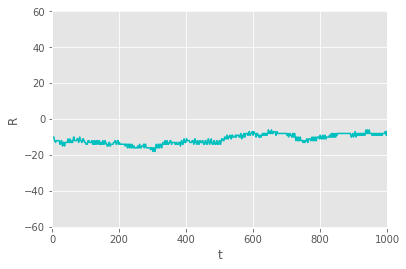

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')


plt.axis([0, max_steps*n_iter - smooth, -60.5, 60.5])


plt.plot(moving_average(r0s, smooth), 'c')
plt.plot(moving_average(r1s, smooth))
plt.xlabel('t');
plt.ylabel('R');

plt.savefig('img/4B_' + mode + '.png')

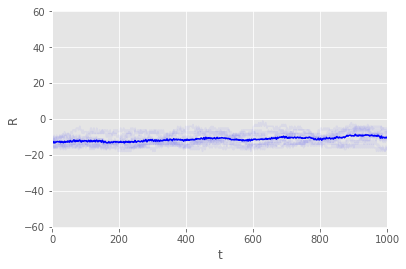

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

# We set a fancy theme
plt.style.use('ggplot')

plt.axis([0, max_steps*n_iter - smooth, -60.5, 60.5])
for i in range(N_EXP):
    plt.plot(moving_average(r0ss[i], 100), 'b', alpha=0.05)
    
plt.plot(moving_average(np.asarray(r0ss).mean(axis=0), 100), 'b', alpha=1)

plt.xlabel('t');
plt.ylabel('R');


plt.savefig('img/4B_' + mode + '.png')

For the adversary case (no forget):

In [40]:
p.Dir / p.Dir.sum()

array([0.50090744, 0.49909256])

In [41]:
env._policy

array([0.53954921, 0.46045079])

In [42]:
moving_average(np.asarray(r0ss).mean(axis=0), 100).mean()

-11.232967032967034

For the neutral case (N=100):

In [28]:
moving_average(np.asarray(r0ss).mean(axis=0), 100).mean()

9.061858141858142

For the friend case (N=100):

In [43]:
moving_average(np.asarray(r0ss).mean(axis=0), 100).mean()

45.01365634365635

In [44]:
p.Dir/p.Dir.sum()

array([0.99818512, 0.00181488])

In [45]:
env._policy

array([0.96124543, 0.03875457])